# Spaceship Titanic Challenge

- Author: Felipe Camargo de Pauli
- Date: 09/23
- Score: 

## 1. Problem Definition and Strategy
- 1.1 Clearly define the problem and objective.
- 1.2 Understand what the data represents and its characteristics.
- 1.3 Propose an initial solution.

Project Summary: Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history!

- **Goal** - Predict who was teleported.
- **Proposition** - Simple Data Science and Machine Learning Workflow

## 2. Gather the Data

- 2.1 Seek out the data (datasets)
- 2.2 Define the data type
- 2.3 Prepare them for import into notebooks

The data was provided by the Kaggle. The data is structured and there is no need to prepare it, because it is already ready to import.

## 3. Data Loading and Initial Visualization
- 3.1 Load the data and visualize the first few rows.
- 3.2 Perform individual transformations.

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

In [175]:
#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [176]:
train_data = pd.read_csv('./train.csv')
test_data  = pd.read_csv('./test.csv')

In [177]:
df = train_data.copy()

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


| Column          | Description   |
|-----------------|---------------|
| **PassengerId** | Every passenger has a unique ID. However, it has a specificity: the ID syntax is GGGG-PP, where G is the group ID (every passenger is part of a group, usually a family, but not necessarily) and PP is the passenger ID. Normally the ID is not relevant, but due to the GGGG, it may be. |
| **HomePlanet**  | The planet from which the passenger departed. It is not necessarily the origin planet, but generally is. |
| **CryoSleep**   | Some passengers were traveling frozen, others normally. Those frozen were confined to their cabin. |
| **Cabin**       | Passenger's cabin. It should be split into Deck/Num/Side, where Side can be P (port) and S (Starboard). Deck can be several letters. We can change the letters and numbers by dummy. |
| **Destination** | The planet to which the passenger is going. There are only three destinations. |
| **Age**         | Age. |
| **VIP**         | Whether the passenger paid for a privileged place. |
| **RoomService** | How much was spent on Room Service. |
| **FoodCourt**   | How much was spent on Food. |
| **ShoppingMall**| How much was spent on shopping. |
| **Spa**         | How much was spent at the spa. |
| **VRDeck**      | How much was spent on entertainment. |
| **Name**        | First and last name of the passenger. It would be nice to get the first and second name and see if there is a correlation. |


In [179]:
# Helpers
def analyse_frequencies(df, columns):
    for column in columns:
        print(f'>> COLUMN: {column}')
        print(df[column].value_counts())
        isColumnNumeric = np.issubdtype(df[column].dtype, np.number)
        if isColumnNumeric:
            print(f'\nMin: {min(df[column])} -- Max: {max(df[column])}\n')
        print('--------------------------------\n')

In [180]:
analyse_frequencies(df, df.columns)

>> COLUMN: PassengerId
0001_01    1
6136_01    1
6141_01    1
6139_06    1
6139_05    1
          ..
3126_01    1
3124_03    1
3124_02    1
3124_01    1
9280_02    1
Name: PassengerId, Length: 8693, dtype: int64
--------------------------------

>> COLUMN: HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64
--------------------------------

>> COLUMN: CryoSleep
False    5439
True     3037
Name: CryoSleep, dtype: int64
--------------------------------

>> COLUMN: Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64
--------------------------------

>> COLUMN: Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64
--------------------------------

>> COLUMN: Age
24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      

**Identifier**
- [OK] PassengerId        | Split     = Group and Person ID; keep Passenger

**Features**
- [OK] HomePlanet         | Dummy     = Earth, Europa and Mars
- [OK] CryoSleep          | Binary    = 0 False - not in cryosleep, 1 True - in cryosleep
- [OK] Cabin              | Split     = Deck, Num and Side
- [OK] Destination        | Dummy     = TRAPPIST-1e, 55 Cancri e, PSO J318.5-22
- [OK] Age                | (nothing) = Min: 0.0 -- Max: 79.0
- [OK] VIP                | Binary    = 0 False - not VIP, 1 True - VIP
- [OK] RoomService        | (nothing) = Min: 0.0 -- Max: 14327.0
- [OK] FoodCourt          | (nothing) = Min: 0.0 -- Max: 29813.0
- [OK] ShoppingMall       | (nothing) = Min: 0.0 -- Max: 23492.0
- [OK] Spa                | (nothing) = Min: 0.0 -- Max: 22408.0
- [OK] VRDeck             | (nothing) = Min: 0.0 -- Max: 24133.0
- [OK] Name               | Split     = Name and Surname

**New**
- [OK] GroupSize          | The number of people from the same group
- [OK] Group              |(drop)
- [OK] Person ID (drop)   | Verify Uniquity before
- [OK] Name and Surname   | Verify, then drop if it's not necessary
- [OK] LuxaryCost         | Sum of all luxary costs. Keep them = Min: 0 -- Max: 35987.0

**Special NaN**
- None

## Transformation

In [181]:
df['PassengerId'].duplicated().sum()

0

In [182]:
# Action 01 - Replace all strange numbers to np.nan
df.replace({'nan': np.nan, None: np.nan}, inplace=True)
df.replace(r'^(nan|NA|none|null)$', np.nan, regex=True, inplace=True)
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

### Splitting

In [183]:
# Action 02 - Split columns
# >> GroupSize
df['Group']     = df['PassengerId'].apply(lambda x: x.split("_")[0])
df['GroupSize'] = df['Group'].map(df['Group'].value_counts())
df.drop("Group", axis=1, inplace=True)

In [184]:
# Action 02 - Split columns
# >> Cabin
df[['Cabin_Deck', 'Cabin_Num', 'Cabin_Size']] = df['Cabin'].str.split('/', expand=True)
df.drop("Cabin", axis=1, inplace=True)

In [185]:
analyse_frequencies(df, ['Cabin_Deck', 'Cabin_Num', 'Cabin_Size'])

>> COLUMN: Cabin_Deck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Cabin_Deck, dtype: int64
--------------------------------

>> COLUMN: Cabin_Num
82      28
86      22
19      22
56      21
176     21
        ..
1644     1
1515     1
1639     1
1277     1
1894     1
Name: Cabin_Num, Length: 1817, dtype: int64
--------------------------------

>> COLUMN: Cabin_Size
S    4288
P    4206
Name: Cabin_Size, dtype: int64
--------------------------------



In [186]:
# Action 03 - Fill NaN fields with forward value
df['Cabin_Num'].fillna(method='ffill', inplace=True)
df["Cabin_Num"].isna().sum()
df["Cabin_Num"] = df["Cabin_Num"].astype(np.uint8)

In [187]:
# Action 02 - Split columns
# >> Name
df[["Name", "Surname"]] = df["Name"].str.split(expand=True)

In [188]:
analyse_frequencies(df, ["Name", "Surname"])

>> COLUMN: Name
Idace      13
Loree      12
Glena      11
Gwendy     11
Kaye       11
           ..
Capies      1
Blues       1
Preonon     1
Siese       1
Chain       1
Name: Name, Length: 2706, dtype: int64
--------------------------------

>> COLUMN: Surname
Casonston     18
Oneiles       16
Domington     15
Litthews      15
Browlerson    14
              ..
Covale         1
Dun            1
Witalnerod     1
Deryplinet     1
Sionerorly     1
Name: Surname, Length: 2217, dtype: int64
--------------------------------



In [189]:
df.drop(["Name", "Surname"], axis=1, inplace=True)
# Action 02 - Split Columns
# There is no need this column. You can drop it

### Dummies

In [190]:
# Action 03 - Get dummies
df = pd.get_dummies(df, "HP", "_",      columns=["HomePlanet"],  dummy_na=True)
df = pd.get_dummies(df, "Dest", "_",    columns=["Destination"], dummy_na=True)
df = pd.get_dummies(df, "C_Deck", "_",  columns=["Cabin_Deck"],  dummy_na=True)
df = pd.get_dummies(df, "C_Size", "_",  columns=["Cabin_Size"],  dummy_na=True)


In [191]:
df.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,C_Deck_C,C_Deck_D,C_Deck_E,C_Deck_F,C_Deck_G,C_Deck_T,C_Deck_nan,C_Size_P,C_Size_S,C_Size_nan
0,0001_01,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,...,0,0,0,0,0,0,0,1,0,0
1,0002_01,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,...,0,0,0,1,0,0,0,0,1,0
2,0003_01,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,...,0,0,0,0,0,0,0,0,1,0
3,0003_02,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,...,0,0,0,0,0,0,0,0,1,0
4,0004_01,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,...,0,0,0,1,0,0,0,0,1,0


### Binaries

In [192]:
# Action 07 - Binaries
# Binaries
df["CryoSleep"] = df["CryoSleep"].apply(lambda x: 1 if "True" else 0).astype(np.int8)   # Can be better
df["VIP"]       = df["VIP"].apply(lambda x: 1 if "True" else 0)                         # Can be better


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         8693 non-null   object 
 1   CryoSleep           8693 non-null   int8   
 2   Age                 8514 non-null   float64
 3   VIP                 8693 non-null   int64  
 4   RoomService         8512 non-null   float64
 5   FoodCourt           8510 non-null   float64
 6   ShoppingMall        8485 non-null   float64
 7   Spa                 8510 non-null   float64
 8   VRDeck              8505 non-null   float64
 9   Transported         8693 non-null   bool   
 10  GroupSize           8693 non-null   int64  
 11  Cabin_Num           8693 non-null   uint8  
 12  HP_Earth            8693 non-null   uint8  
 13  HP_Europa           8693 non-null   uint8  
 14  HP_Mars             8693 non-null   uint8  
 15  HP_nan              8693 non-null   uint8  
 16  Dest_5

In [194]:
# TASK 05 - Transform Target
# Target
df["Transported"] = df["Transported"].apply(lambda x: 1 if x else 0)

### New

In [195]:
# Action 09 - Create new features
# LuxaryCost
df["LuxaryCost"] = df["RoomService"] + df["FoodCourt"] + df["ShoppingMall"] + df["Spa"] + df["VRDeck"]

In [196]:
analyse_frequencies(df, ["LuxaryCost"])

>> COLUMN: LuxaryCost
0.0        3247
809.0        50
788.0        39
804.0        36
803.0        34
           ... 
7994.0        1
12238.0       1
397.0         1
2871.0        1
4637.0        1
Name: LuxaryCost, Length: 2116, dtype: int64

Min: 0.0 -- Max: 35987.0

--------------------------------



In [197]:
df.isna().sum()

PassengerId             0
CryoSleep               0
Age                   179
VIP                     0
RoomService           181
FoodCourt             183
ShoppingMall          208
Spa                   183
VRDeck                188
Transported             0
GroupSize               0
Cabin_Num               0
HP_Earth                0
HP_Europa               0
HP_Mars                 0
HP_nan                  0
Dest_55 Cancri e        0
Dest_PSO J318.5-22      0
Dest_TRAPPIST-1e        0
Dest_nan                0
C_Deck_A                0
C_Deck_B                0
C_Deck_C                0
C_Deck_D                0
C_Deck_E                0
C_Deck_F                0
C_Deck_G                0
C_Deck_T                0
C_Deck_nan              0
C_Size_P                0
C_Size_S                0
C_Size_nan              0
LuxaryCost            908
dtype: int64

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         8693 non-null   object 
 1   CryoSleep           8693 non-null   int8   
 2   Age                 8514 non-null   float64
 3   VIP                 8693 non-null   int64  
 4   RoomService         8512 non-null   float64
 5   FoodCourt           8510 non-null   float64
 6   ShoppingMall        8485 non-null   float64
 7   Spa                 8510 non-null   float64
 8   VRDeck              8505 non-null   float64
 9   Transported         8693 non-null   int64  
 10  GroupSize           8693 non-null   int64  
 11  Cabin_Num           8693 non-null   uint8  
 12  HP_Earth            8693 non-null   uint8  
 13  HP_Europa           8693 non-null   uint8  
 14  HP_Mars             8693 non-null   uint8  
 15  HP_nan              8693 non-null   uint8  
 16  Dest_5

## 4. Exploratory Data Analysis (EDA)


- 4.1 Visualize direct correlation between each Feature and Target.
- 4.2 Analyze descriptive statistics and distributions.
- 4.3 Identify and handle inconsistencies and outliers.
- 4.4 Visualize relationships and correlations between variables.

/tmp/ipykernel_31455/1168209765.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


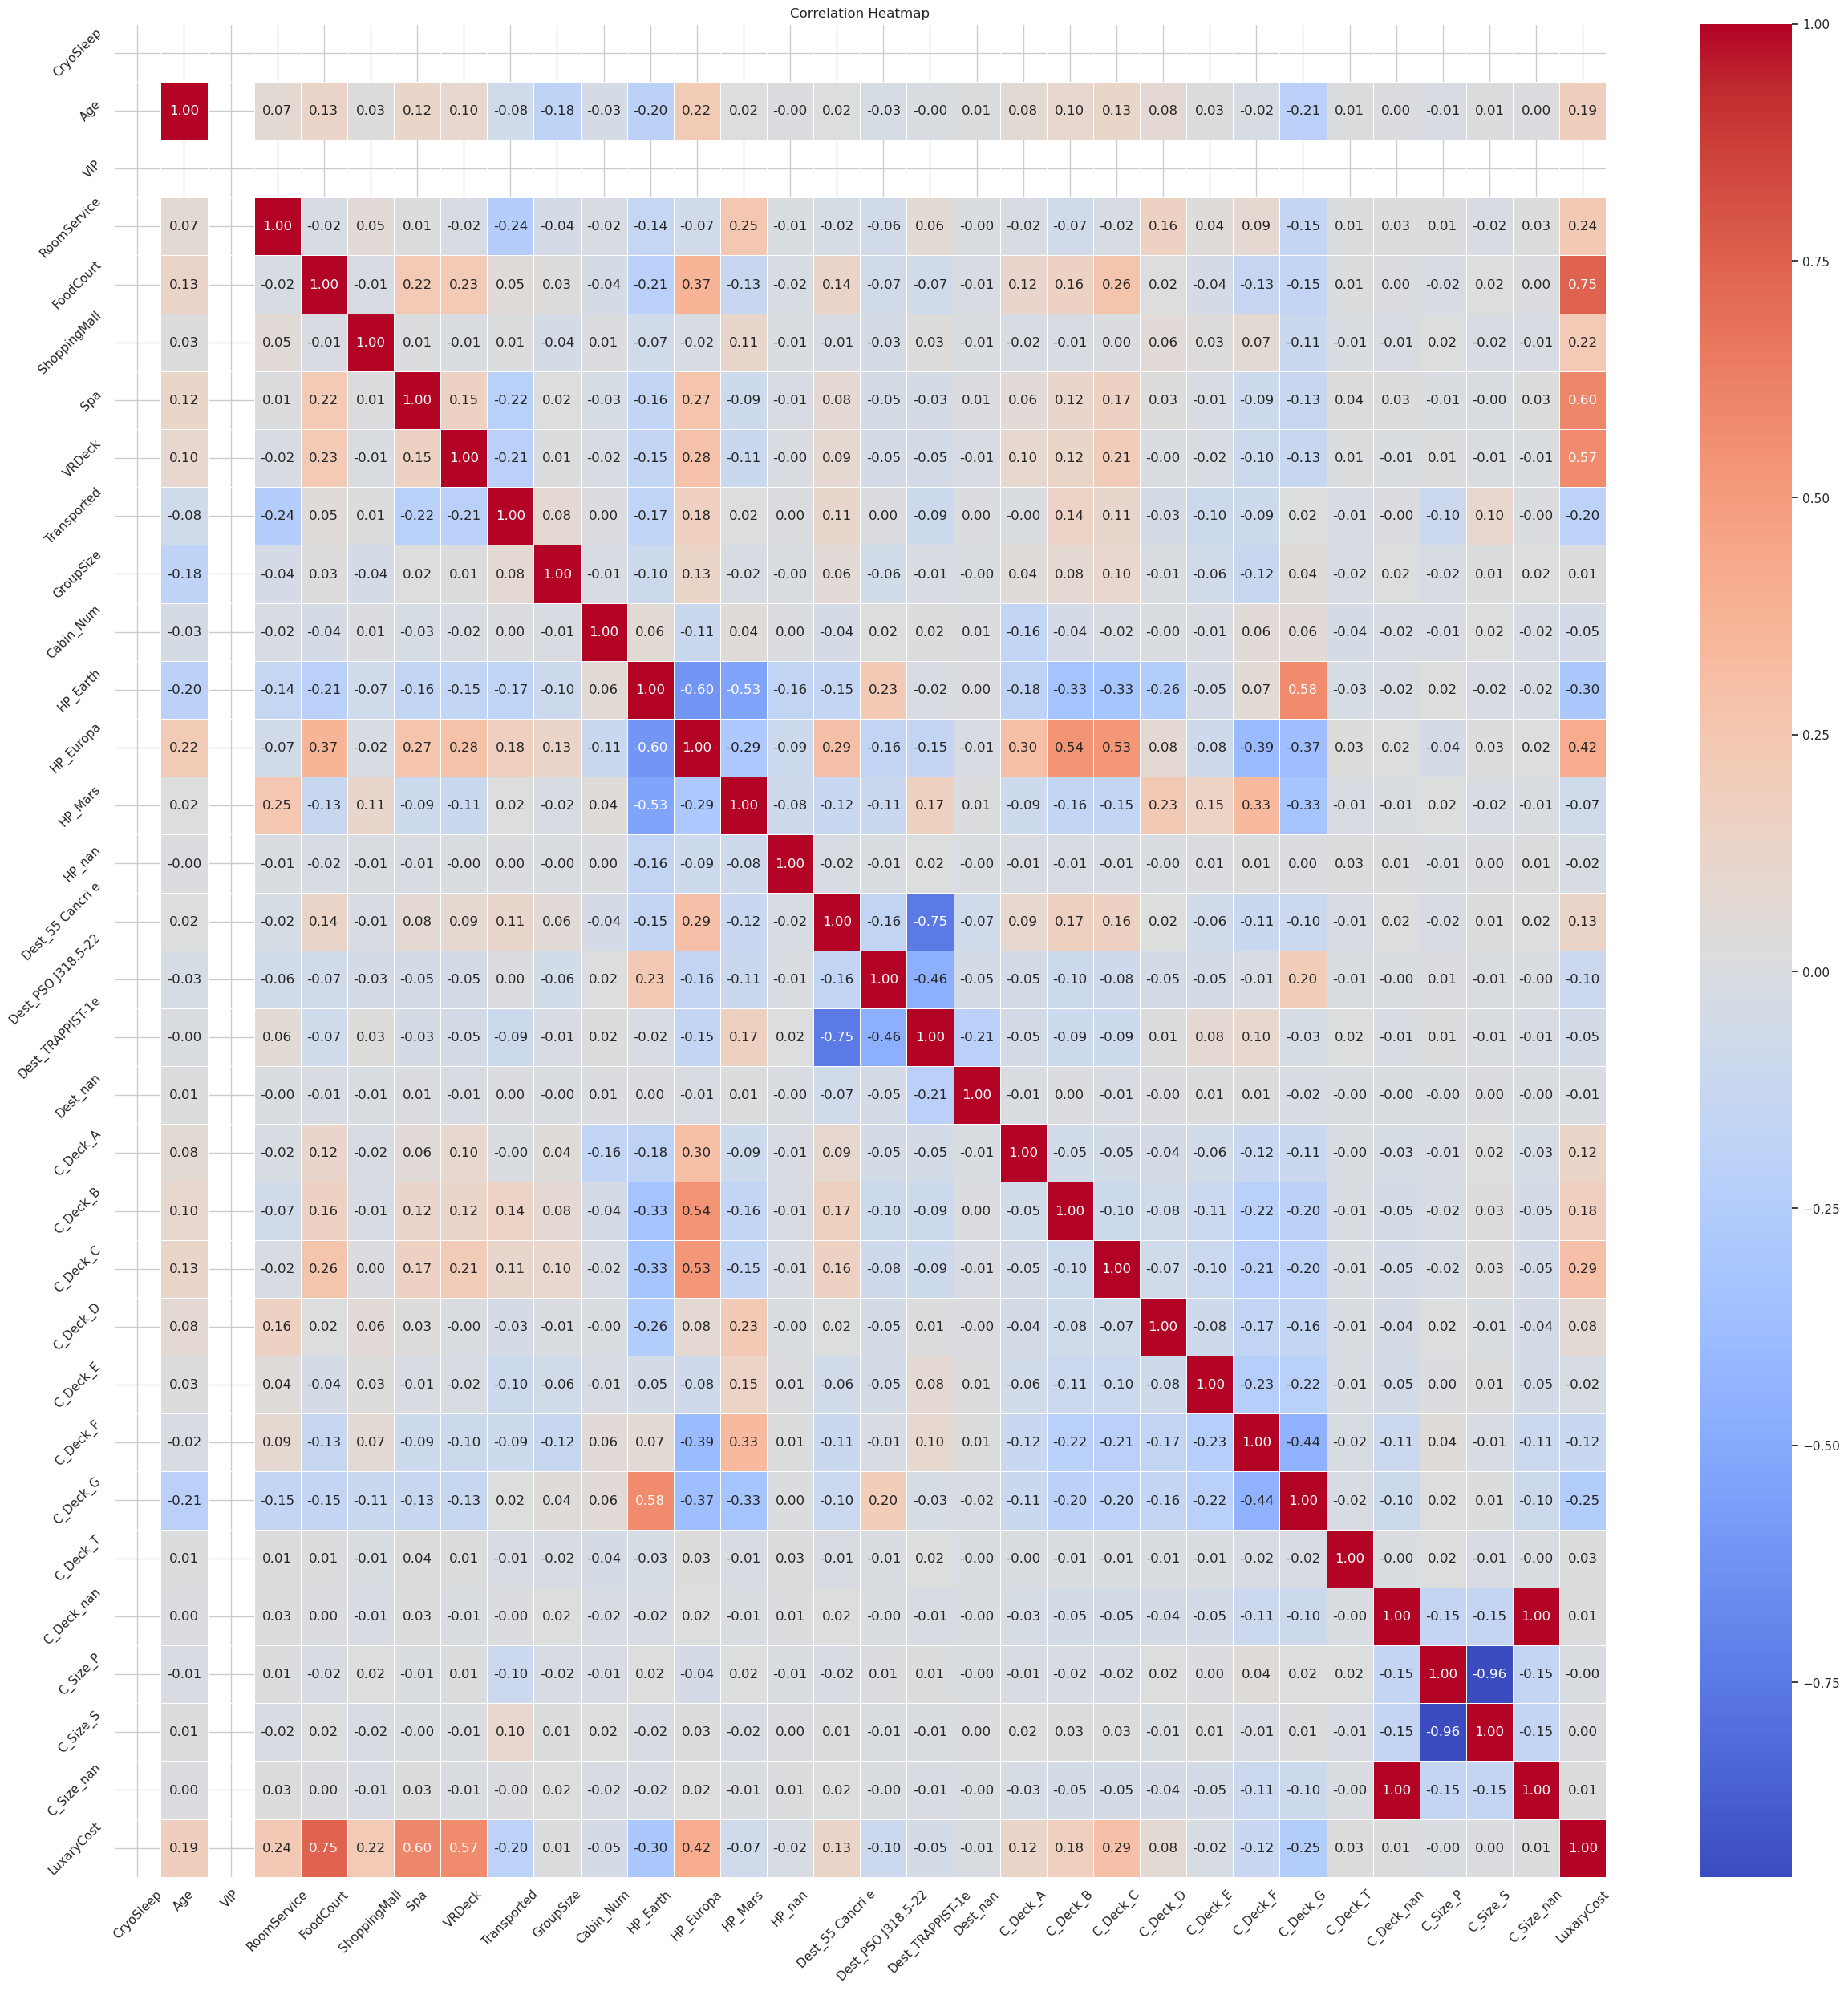

In [199]:
plt.figure(figsize=(30,30))

correlations = df.corr()
# Cria um heatmap
sns.heatmap(correlations, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)


# Título
plt.title('Correlation Heatmap')

# Ajusta os rótulos para melhor visualização
plt.xticks(rotation=45) 
plt.yticks(rotation=45) 

# Exibe o gráfico
plt.show()

## Hipotheses
#### Age
**Facts**
- Greater corr = HP.Europe
- Less people were teletransported than not;
- Crianças entre 0 e 12 anos são mais suscetíveis ao teletransporte;
- mean       28.827930
- std        14.489021
- min         0.000000
- 25%        19.000000
- 50%        27.000000
- 75%        38.000000
- max        79.000000
- **Fill null value with std**

**Hypothesis**
- [OK] H01_Age_Mean   One mean for teletransported and other for not
- [OK] H02_Age_Groups It's better to have age's groups instead float ages

#### Cabin_Num
**Facts**


**Hypothesis**

In [200]:
# Hypothesis
# H01_Age_Mean    = True  # LR, DT
H01_Age_Mean    = True
H02_Age_Groups  = True

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         8693 non-null   object 
 1   CryoSleep           8693 non-null   int8   
 2   Age                 8514 non-null   float64
 3   VIP                 8693 non-null   int64  
 4   RoomService         8512 non-null   float64
 5   FoodCourt           8510 non-null   float64
 6   ShoppingMall        8485 non-null   float64
 7   Spa                 8510 non-null   float64
 8   VRDeck              8505 non-null   float64
 9   Transported         8693 non-null   int64  
 10  GroupSize           8693 non-null   int64  
 11  Cabin_Num           8693 non-null   uint8  
 12  HP_Earth            8693 non-null   uint8  
 13  HP_Europa           8693 non-null   uint8  
 14  HP_Mars             8693 non-null   uint8  
 15  HP_nan              8693 non-null   uint8  
 16  Dest_5

### Age

/tmp/ipykernel_31455/3867841062.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Transported', y='Cabin_Num', data=df, ci=None, ax=axs[0, 0])


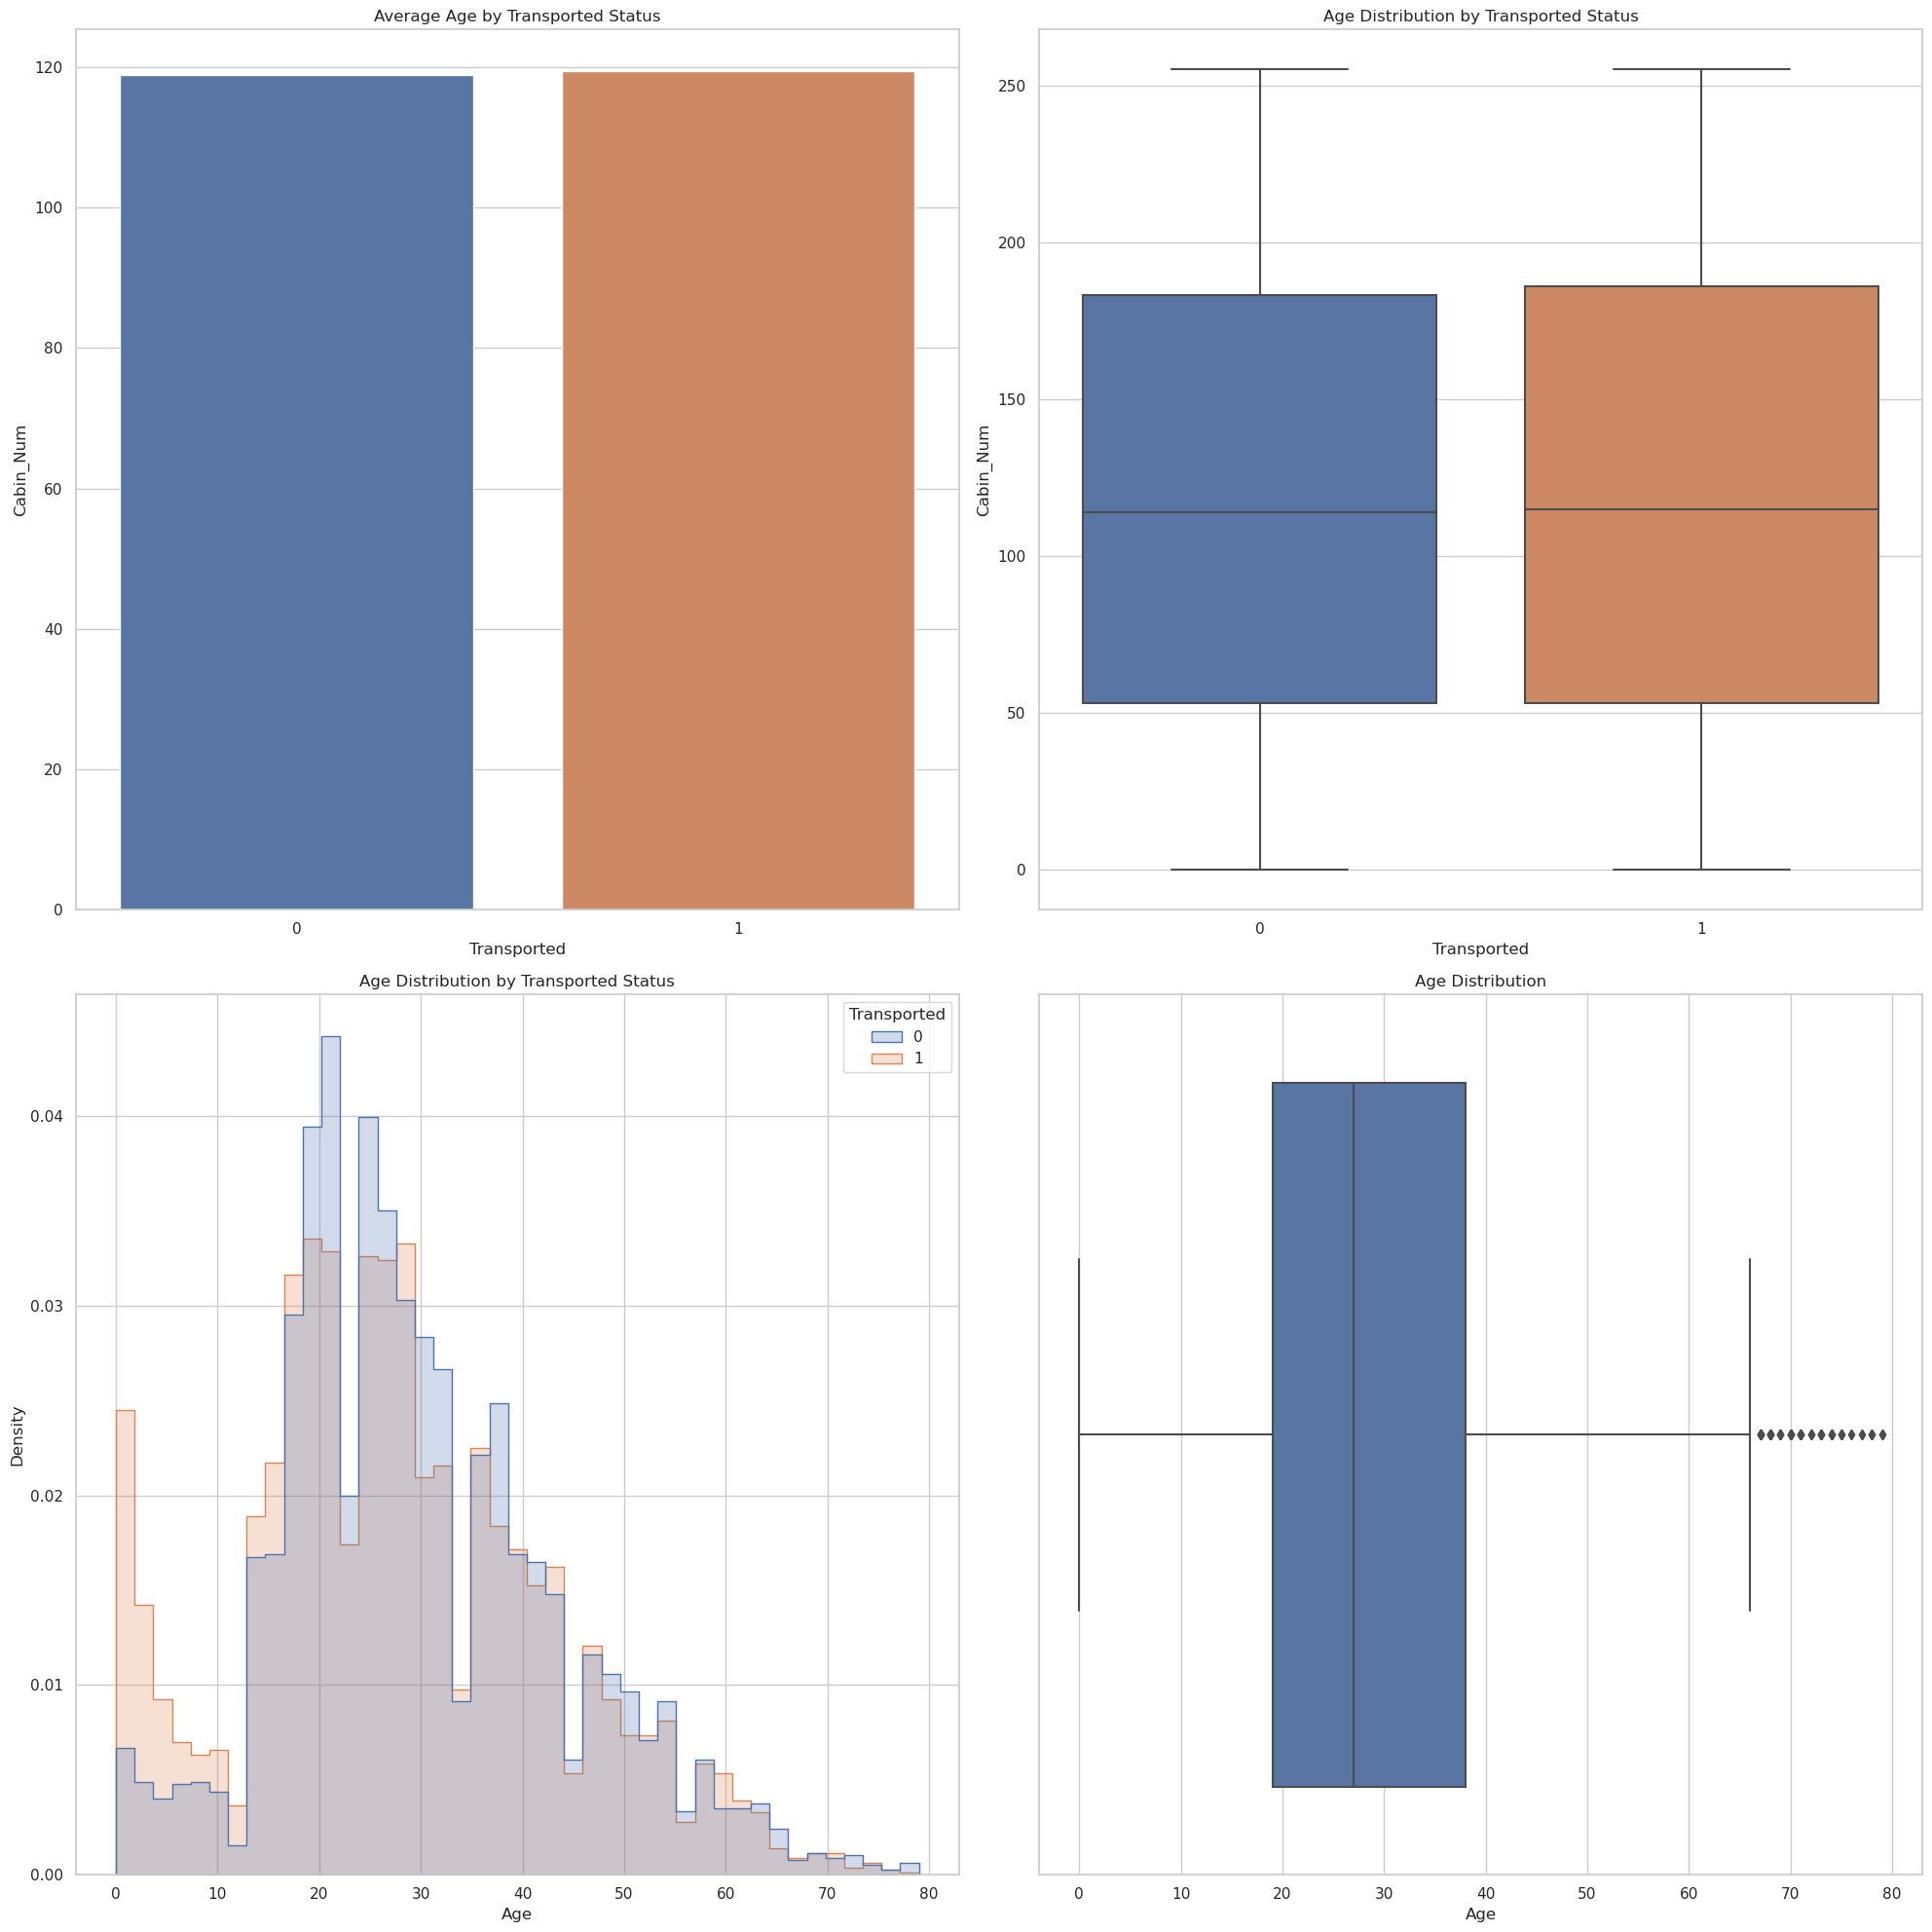

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar uma figura e uma grade de subplots com 2 linhas e 4 colunas
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# Plot 1: Barplot
sns.barplot(x='Transported', y='Cabin_Num', data=df, ci=None, ax=axs[0, 0])
axs[0, 0].set_title('Average Age by Transported Status')

# Plot 2: Boxplot
sns.boxplot(x='Transported', y='Cabin_Num', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Age Distribution by Transported Status')

# Plot 3: Histograma
sns.histplot(df, x='Age', hue='Transported', element='step', stat='density', common_norm=False, ax=axs[1, 0])
axs[1, 0].set_title('Age Distribution by Transported Status')

# Plot 4: Boxplot
sns.boxplot(x='Age', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Age Distribution')

# Ajustando o layout para evitar sobreposição
plt.tight_layout()
plt.show()


In [203]:
df["Age"].describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

In [204]:
from scipy.stats import ttest_ind

# Divide o dataset
transported = df[df['Transported'] == True]['Age'].dropna()
not_transported = df[df['Transported'] == False]['Age'].dropna()

# Teste t
t_stat, p_value = ttest_ind(transported, not_transported)

# Mostra os resultados
print(f't-statistic: {t_stat}\np-value: {p_value}')

t-statistic: -6.941461666045089
p-value: 4.165050977554494e-12


In [205]:
if H01_Age_Mean:
    tfalse_mean, ttrue_mean = df.groupby("Transported").mean()["Age"]
    tfalse_mean = round(tfalse_mean, 2)
    ttrue_mean = round(ttrue_mean, 2)
    print(f'Transported    : {tfalse_mean}\nNot Transported: {ttrue_mean}')
    df.loc[(df['Age'].isna()) & (df['Transported']), 'Age']  = ttrue_mean
    df.loc[(df['Age'].isna()) & (~df['Transported']), 'Age'] = tfalse_mean
else:
    df["Age"].fillna(df['Age'].mean(), inplace=True)

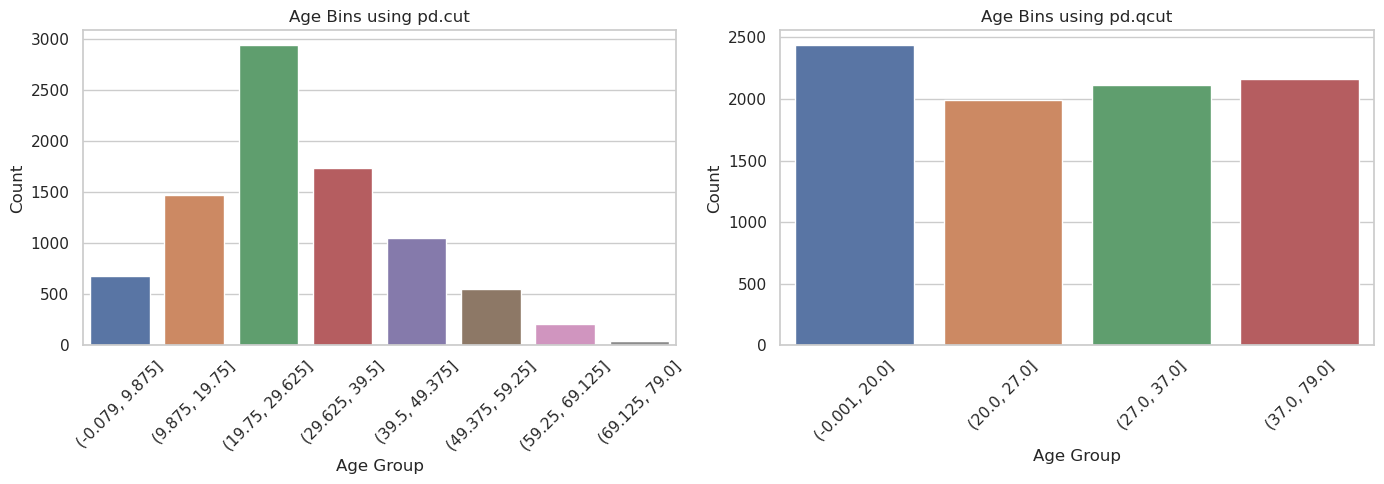

In [206]:
AgeGroup  = pd.DataFrame()

AgeGroup["cut"]  = pd.cut(df['Age'], bins=8)
AgeGroup["qcut"] = pd.qcut(df['Age'], q=4)

# Criando uma figura com 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras para os bins criados com pd.cut
sns.countplot(data=AgeGroup, x='cut', ax=ax[0])
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_title('Age Bins using pd.cut')
ax[0].set_xlabel('Age Group')
ax[0].set_ylabel('Count')

# Gráfico de barras para os bins criados com pd.qcut
sns.countplot(data=AgeGroup, x='qcut', ax=ax[1])
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_title('Age Bins using pd.qcut')
ax[1].set_xlabel('Age Group')
ax[1].set_ylabel('Count')

# Ajustando o layout para evitar sobreposição
plt.tight_layout()
plt.show()

In [207]:
if H02_Age_Groups:
    df["AgeGroups"] = AgeGroup["cut"]
    print(df["AgeGroups"].head())
    print(type(df))
    df = pd.get_dummies(df, prefix="AG", columns=["AgeGroups"])
    df.info()

In [208]:
df["Transported"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8693 entries, 0 to 8692
Series name: Transported
Non-Null Count  Dtype
--------------  -----
8693 non-null   int64
dtypes: int64(1)
memory usage: 68.0 KB


In [209]:
df.isna().sum()

PassengerId             0
CryoSleep               0
Age                     0
VIP                     0
RoomService           181
FoodCourt             183
ShoppingMall          208
Spa                   183
VRDeck                188
Transported             0
GroupSize               0
Cabin_Num               0
HP_Earth                0
HP_Europa               0
HP_Mars                 0
HP_nan                  0
Dest_55 Cancri e        0
Dest_PSO J318.5-22      0
Dest_TRAPPIST-1e        0
Dest_nan                0
C_Deck_A                0
C_Deck_B                0
C_Deck_C                0
C_Deck_D                0
C_Deck_E                0
C_Deck_F                0
C_Deck_G                0
C_Deck_T                0
C_Deck_nan              0
C_Size_P                0
C_Size_S                0
C_Size_nan              0
LuxaryCost            908
dtype: int64

### Room Service, FoodCourt, ShoppingMall, Spa and VRDeck

In [210]:
# It could be better
simple_mean_colums = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

for column in simple_mean_colums:
    df[column] = df[column].fillna(df[column].mean())
    
df["LuxaryCost"] = df["RoomService"] + df["FoodCourt"] + df["ShoppingMall"] + df["Spa"] + df["VRDeck"]

In [211]:
df.isna().sum()

PassengerId           0
CryoSleep             0
Age                   0
VIP                   0
RoomService           0
FoodCourt             0
ShoppingMall          0
Spa                   0
VRDeck                0
Transported           0
GroupSize             0
Cabin_Num             0
HP_Earth              0
HP_Europa             0
HP_Mars               0
HP_nan                0
Dest_55 Cancri e      0
Dest_PSO J318.5-22    0
Dest_TRAPPIST-1e      0
Dest_nan              0
C_Deck_A              0
C_Deck_B              0
C_Deck_C              0
C_Deck_D              0
C_Deck_E              0
C_Deck_F              0
C_Deck_G              0
C_Deck_T              0
C_Deck_nan            0
C_Size_P              0
C_Size_S              0
C_Size_nan            0
LuxaryCost            0
dtype: int64

### Cabin_Num

/tmp/ipykernel_31455/2479184656.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Transported', y='Cabin_Num', data=df, ci=None, ax=axs[0, 0])


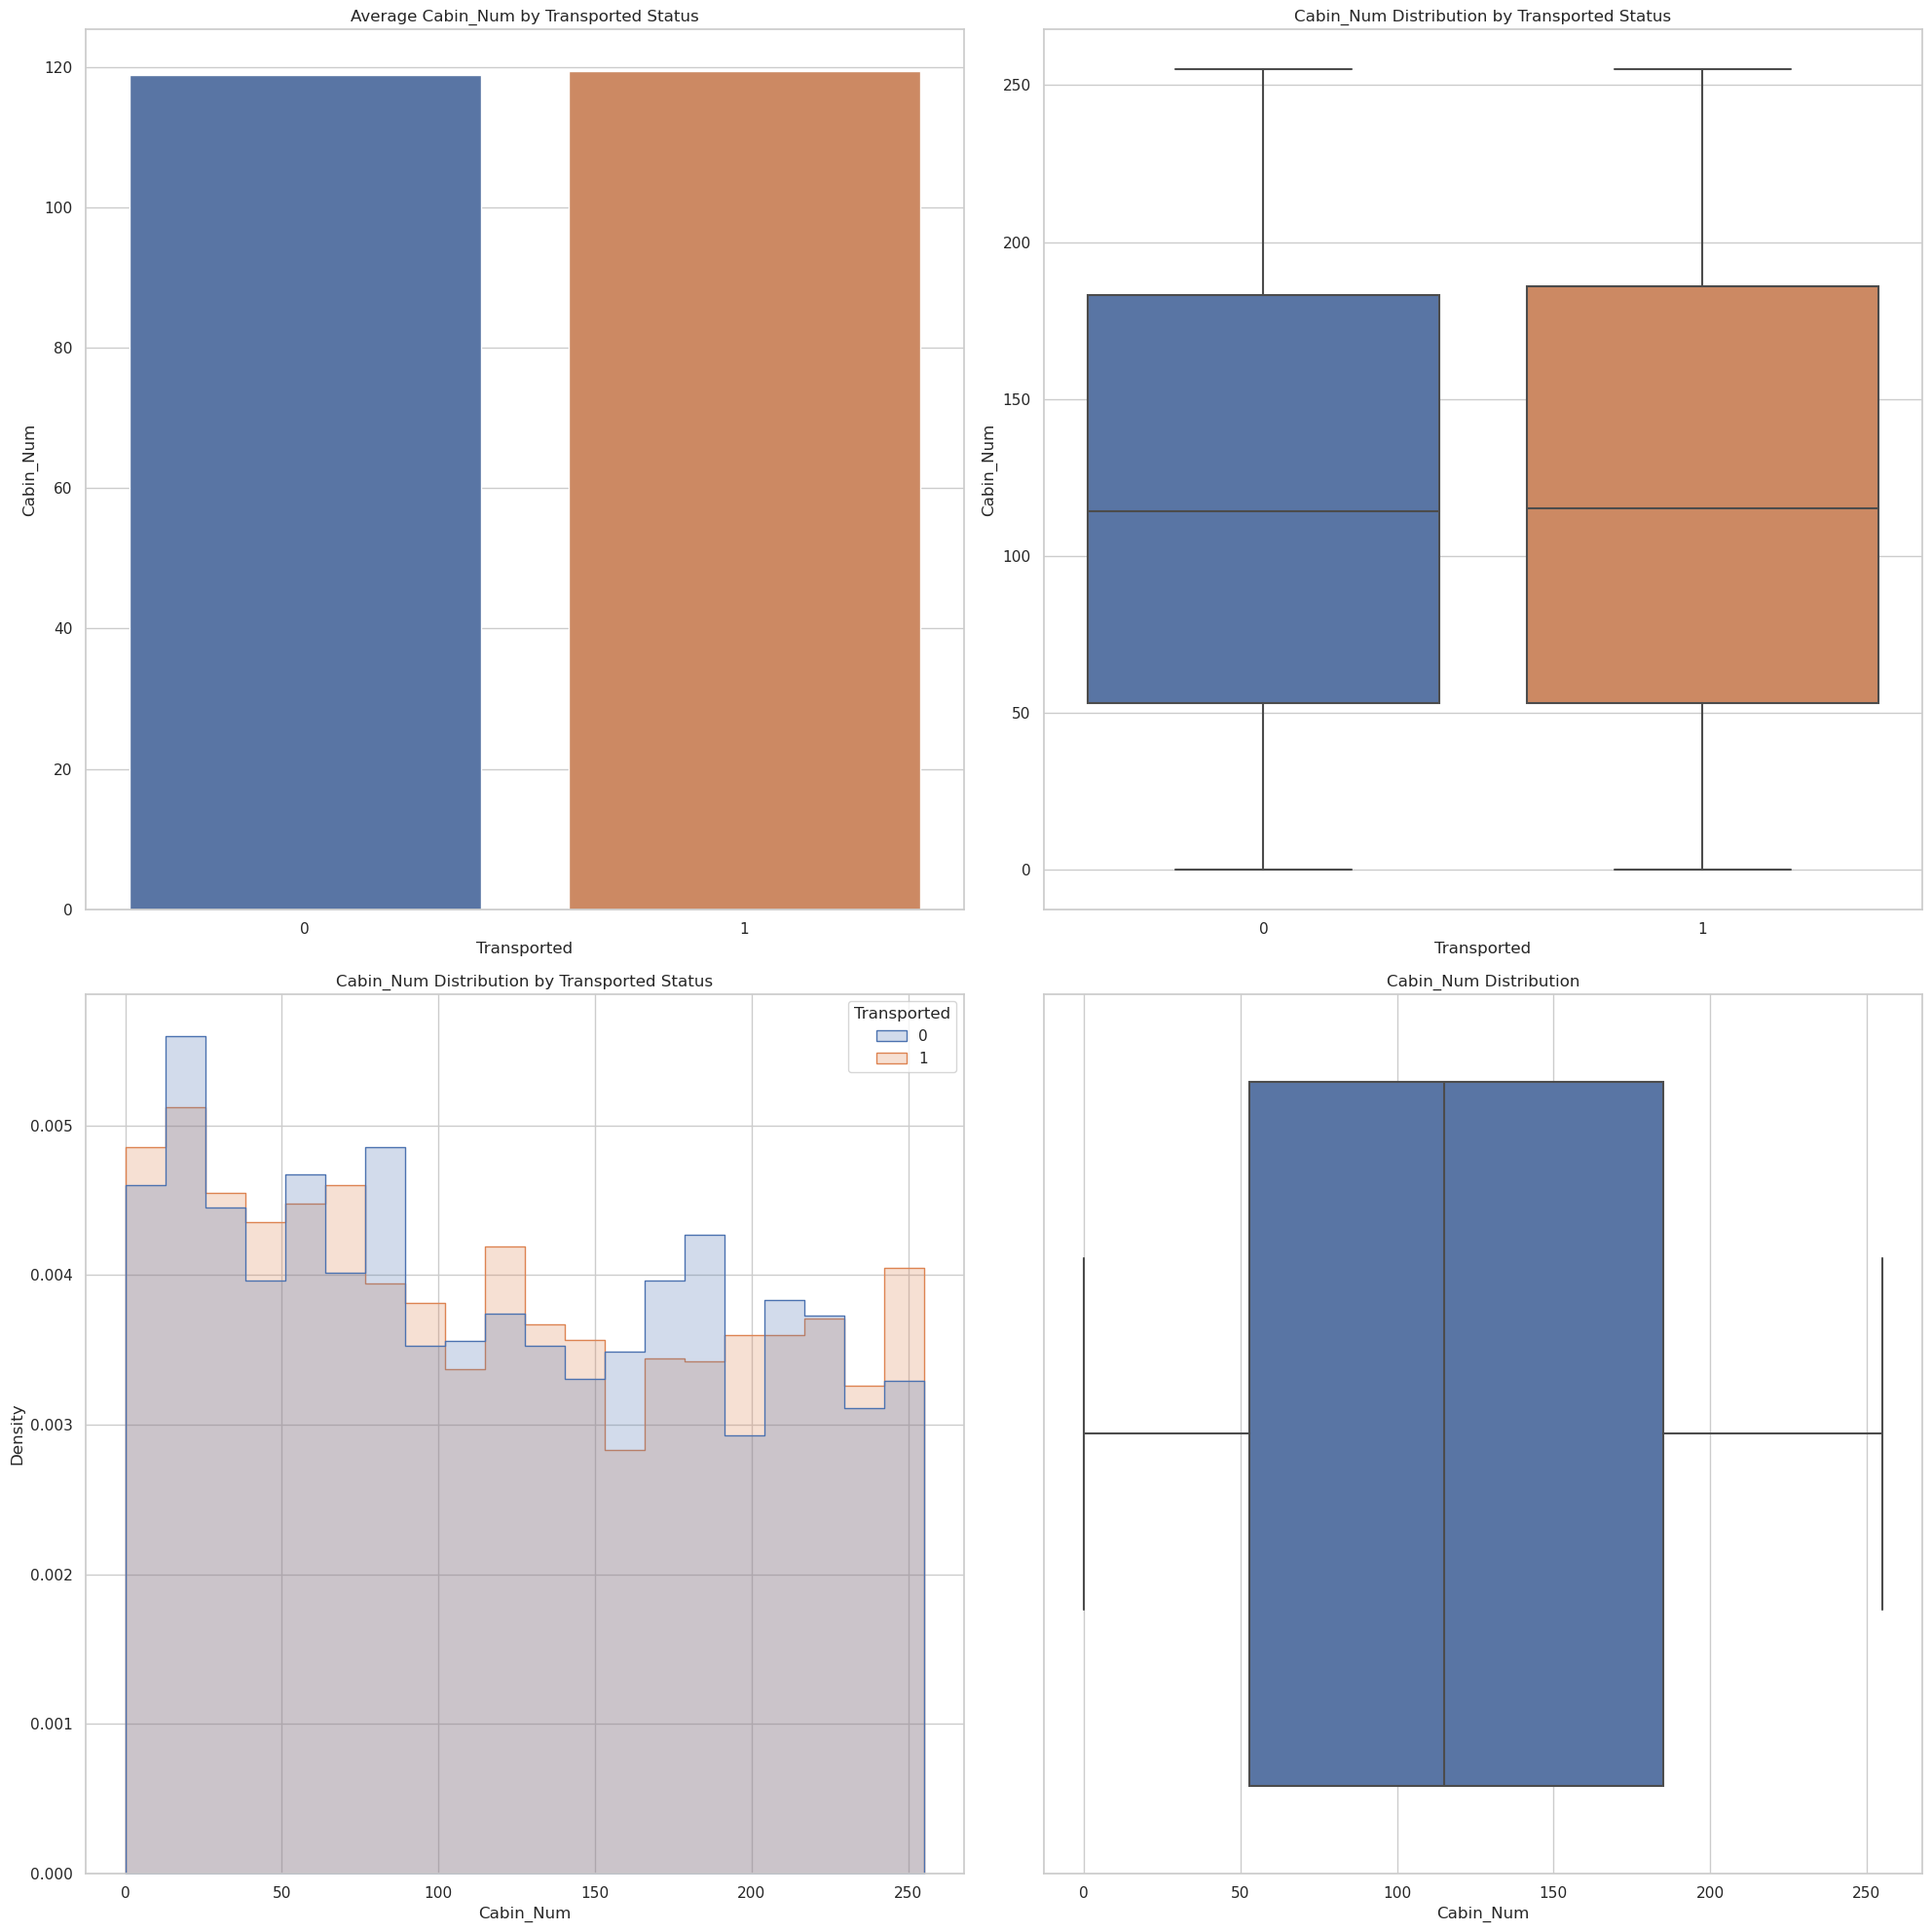

In [212]:
# Criar uma figura e uma grade de subplots com 2 linhas e 4 colunas
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# Plot 1: Barplot
sns.barplot(x='Transported', y='Cabin_Num', data=df, ci=None, ax=axs[0, 0])
axs[0, 0].set_title('Average Cabin_Num by Transported Status')

# Plot 2: Boxplot
sns.boxplot(x='Transported', y='Cabin_Num', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Cabin_Num Distribution by Transported Status')

# Plot 3: Histograma
sns.histplot(df, x='Cabin_Num', hue='Transported', element='step', stat='density', common_norm=False, ax=axs[1, 0])
axs[1, 0].set_title('Cabin_Num Distribution by Transported Status')

# Plot 4: Boxplot
sns.boxplot(x='Cabin_Num', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Cabin_Num Distribution')

# Ajustando o layout para evitar sobreposição
plt.tight_layout()
plt.show()

In [213]:
df["Cabin_Num"].describe()

count    8693.000000
mean      119.144139
std        74.927064
min         0.000000
25%        53.000000
50%       115.000000
75%       185.000000
max       255.000000
Name: Cabin_Num, dtype: float64

In [214]:
# df["Cabin_Num"] = df["Cabin_Num"].fillna(df["Cabin_Num"].mean())


In [215]:
df.isna().sum()

PassengerId           0
CryoSleep             0
Age                   0
VIP                   0
RoomService           0
FoodCourt             0
ShoppingMall          0
Spa                   0
VRDeck                0
Transported           0
GroupSize             0
Cabin_Num             0
HP_Earth              0
HP_Europa             0
HP_Mars               0
HP_nan                0
Dest_55 Cancri e      0
Dest_PSO J318.5-22    0
Dest_TRAPPIST-1e      0
Dest_nan              0
C_Deck_A              0
C_Deck_B              0
C_Deck_C              0
C_Deck_D              0
C_Deck_E              0
C_Deck_F              0
C_Deck_G              0
C_Deck_T              0
C_Deck_nan            0
C_Size_P              0
C_Size_S              0
C_Size_nan            0
LuxaryCost            0
dtype: int64

## 7. Modeling
7.1 Split the data into training and testing sets.
7.2 Select and train initial models.
7.3 Evaluate and compare the performance of the models.
7.4 Hyperparameter tuning and optimization.

In [216]:
X = df.drop(['PassengerId', 'Transported'], axis=1)
y = df["Transported"]

In [217]:

print(f'{X.shape}')
print(f'{y.shape}')
X.info()

(8693, 31)
(8693,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CryoSleep           8693 non-null   int8   
 1   Age                 8693 non-null   float64
 2   VIP                 8693 non-null   int64  
 3   RoomService         8693 non-null   float64
 4   FoodCourt           8693 non-null   float64
 5   ShoppingMall        8693 non-null   float64
 6   Spa                 8693 non-null   float64
 7   VRDeck              8693 non-null   float64
 8   GroupSize           8693 non-null   int64  
 9   Cabin_Num           8693 non-null   uint8  
 10  HP_Earth            8693 non-null   uint8  
 11  HP_Europa           8693 non-null   uint8  
 12  HP_Mars             8693 non-null   uint8  
 13  HP_nan              8693 non-null   uint8  
 14  Dest_55 Cancri e    8693 non-null   uint8  
 15  Dest_PSO J318.5-22  8693 non-null   

In [218]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [219]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Modelos
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Classifier': SVC(),
}

# Treinar e avaliar modelos
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    accuracy = accuracy_score(y_val, predictions)
    print(f'{name}: {accuracy}')


Logistic Regression: 0.780333525014376
Decision Tree: 0.7366302472685451
Random Forest: 0.7734330074755607


Gradient Boosting: 0.7780333525014376
Support Vector Classifier: 0.772857964347326


False, False  
Logistic Regression: 0.780333525014376  
Decision Tree: 0.730879815986199  
Random Forest: 0.7676825761932144  
Gradient Boosting: 0.7780333525014376  
Support Vector Classifier: 0.772857964347326  

True, False  
Logistic Regression: 0.7809085681426107         >  
Decision Tree: 0.730879815986199                =  
Random Forest: 0.7751581368602645               >  
Gradient Boosting: 0.7780333525014376           =  
Support Vector Classifier: 0.772857964347326    =  

False, True  
Logistic Regression: 0.777458309373203  
Decision Tree: 0.7199539965497412  
Random Forest: 0.7711328349626222  
Gradient Boosting: 0.777458309373203  
Support Vector Classifier: 0.772857964347326  

True, True  
Logistic Regression: 0.7797584818861415  
Decision Tree: 0.7343300747556066  
Random Forest: 0.7763082231167338  
Gradient Boosting: 0.7837837837837838  
Support Vector Classifier: 0.772857964347326  


Greater:    Gradient Boosting   -> True, True  
            Logistic Regression -> True, False  
            Logistic Regression -> False, False  

In [220]:
model_accuracies = {}

In [221]:
# # GRADIENT BOOSTING
# from sklearn.ensemble import GradientBoostingClassifier
# # Create the Gradient Boosting classifier
# gb_classifier = GradientBoostingClassifier(n_estimators=10000, learning_rate=0.1, random_state=42)

# # Train the Gradient Boosting classifier on the training data
# gb_classifier.fit(X_train, y_train)
# score= gb_classifier.score(X_train, y_train)*100
# print("Model Score:", score)
# model_accuracies['GradientBoosting']= score

In [222]:
# # LOGISTIC REGRESSION
# from sklearn.linear_model import LogisticRegression
# # Create the Logistic Regression classifier
# logreg_classifier = LogisticRegression(max_iter=10000)

# # Train the Logistic Regression classifier on the training data
# logreg_classifier.fit(X_train, y_train)
# score= logreg_classifier.score(X_train, y_train)*100
# print("Model Score:", score)
# model_accuracies['LogisticRegression']= score

In [231]:
# RANDOM FOREST
from sklearn.model_selection import GridSearchCV
# Define the hyperparameters and their values to search
param_grid = {
                "criterion" : ("gini", "entropy", "log_loss"), 
                'n_estimators': [25, 50, 100, 150],
                "max_depth" : range(1,11),
                'max_features': ['sqrt', 'log2', None], 
                'max_leaf_nodes': [3, 6, 9], 
              }
model_accuracies={}
# Create a RandomForestClassifier
model = RandomForestClassifier(random_state=420)

# Initialize GridSearchCV with the model, hyperparameters, and cross-validation strategy
rf_model = GridSearchCV(model, param_grid, n_jobs=-1)

# Fit the GridSearchCV to the data
rf_model.fit(X_train, y_train)
score=rf_model.score(X_train, y_train)*100
print("Model Score:", score)
# Print the best hyperparameters and corresponding accuracy score
print("Best Hyperparameters:", rf_model.best_params_)
print("Best Accuracy:", rf_model.best_score_)

Model Score: 78.5878631003739
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 9, 'n_estimators': 50}
Best Accuracy: 0.7804155180528475


In [232]:
rf_model = RandomForestClassifier(
    max_depth       = 5, 
    max_leaf_nodes  = 9, 
    n_estimators    = 50
)
rf_model.fit(X_train, y_train)
score=rf_model.score(X_train, y_train)*100
model_accuracies['Random Forest'] = score

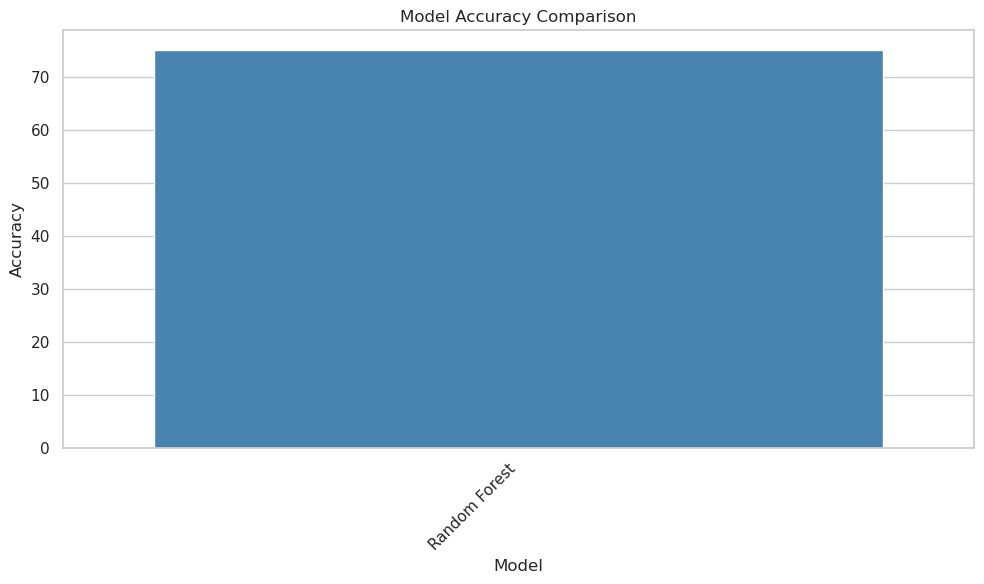

In [233]:
accuracy_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])
# Step 6: Create the plot using Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette="Blues_d")
plot.set_title('Model Accuracy Comparison')
plot.set_xlabel('Model')
plot.set_ylabel('Accuracy')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

In [234]:
train_data.info()
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
 12  GroupSize     8693 non-null   int64  
 13  Cabin_Deck    8494 non-null   object 
 14  Cabin_Num     8693 non-null   uint8  
 15  Cabin_Size    8494 non-null   object 
dtypes: bool(1), float64(6), int64(1), object(7), uint8(1)
memory usage: 967.9+ KB


In [235]:
from preprocessing import preprocessing

hypothesis = {
    "H01_Age_Mean"  : H01_Age_Mean,
    "H02_Age_Groups": H02_Age_Groups,
}

train_data = pd.read_csv('./train.csv')
test_data  = pd.read_csv('./test.csv')

df_new = preprocessing(train_data, hypothesis, False)

print(df.shape)
print(df_new.shape)

(8693, 33)
(8693, 33)


In [236]:
df_test = preprocessing(test_data, hypothesis, True)

X_test = df_test.drop(['PassengerId'], axis=1)

In [237]:
# Escolha o melhor modelo
best_model = rf_model

# Fazer previsões no conjunto de teste
test_predictions = best_model.predict(X_test)

test_predictions = test_predictions.astype(np.bool8)

# Preparar arquivo de submissão
submission = pd.DataFrame({'PassengerId': df_test["PassengerId"], 'Transported': test_predictions})
submission.to_csv('submission.csv', index=False)